In [42]:
disp('PASSENGER CARS SOLD') 
pkg load io
cars = csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/carsdata.csv");
cars=cars(122:573,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(cars) % dimension to later construct time vector!!

disp('NEW PRIVATE HOUSING UNITS STARTED')
house=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/housedata.csv");
house=house(134:585,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(house)

disp('ALL EMPLOYEES, CONSTRUCTION')
conworker=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/conworker.csv");
conworker=conworker(374:825,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(conworker)

disp('MANUFACTURERS NEW ORDERS')
manorder=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/manorder.csv");
manorder=manorder(2:188,3); % column 3 = monthly data, sampled from 1 Feb 1992 to 31 August (8) 2007, no data for 1970s
size(manorder)

PASSENGER CARS SOLD
ans =

   452     1

NEW PRIVATE HOUSING UNITS STARTED
ans =

   452     1

ALL EMPLOYEES, CONSTRUCTION
ans =

   452     1

MANUFACTURERS NEW ORDERS
ans =

   187     1



PLOTTING MONTHLY CARS
window_c = 31


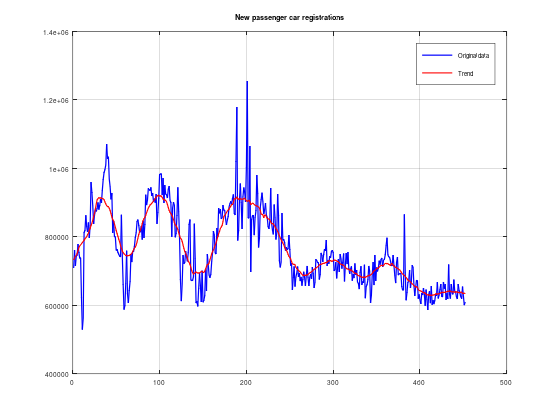

In [43]:
disp('PLOTTING MONTHLY CARS')
title('New passenger car registrations') % time series, not modified, plotted
pkg load control % toolbox de control
window_c=31 % window of 2.5 years (30 months)
plot(cars,'b','linewidth',1.2)
trendcars=movmean(cars,window_c); % trend for monthly cars
% M = movmean(A,k) returns an array of local k-point mean values, 
% where each mean is calculated over a sliding window of length k across neighboring elements of A. 
% When k is odd, the window is centered about the element in the current position. 
% The window size is automatically truncated at the endpoints when there are not enough elements to fill the window.
% When the window is truncated, the average is taken over only the elements that fill the window. M is the same size as A.
hold on;
plot(trendcars,'r','linewidth',1.1) % plotting data trend
hold off;
grid on;
title('New passenger car registrations')
legend('Original data','Trend')

PLOTTING MONTHLY HOUSES
window_h = 61


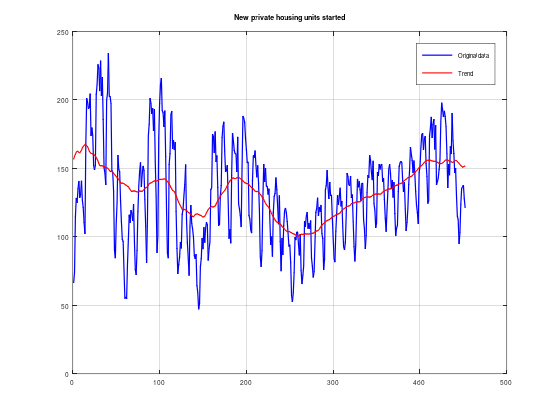

In [44]:
disp('PLOTTING MONTHLY HOUSES')
window_h=61
trendhouse=movmean(house,window_h); % trend for housing data
plot(house,'b','linewidth',1.2)
hold on
plot(trendhouse,'r','linewidth',1.1)
hold off
grid on
title('New private housing units started') % time series, not modified, plotted
legend('Original data','Trend')

PLOTTING EMPLOYEES, CONSTRUCTION
window_w = 31


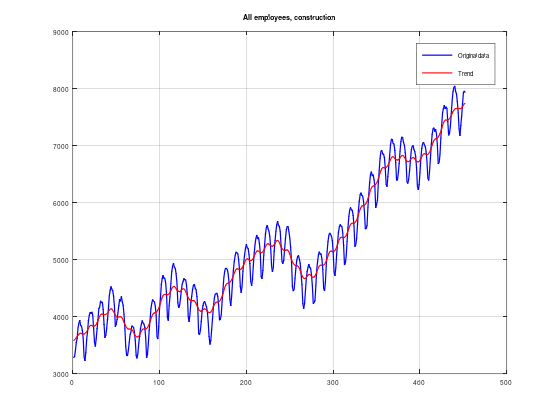

In [45]:
disp('PLOTTING EMPLOYEES, CONSTRUCTION') % notice - no heteroscedasticity 
window_w=31
trendworker=movmean(conworker,window_w);
plot(conworker,'b','linewidth',1.2)
hold on
plot(trendworker,'r','linewidth',1.1)
hold off
grid on
title('All employees, construction')
legend('Original data','Trend')

PLOTTING NEW MANUFACTURING ORDERS
window_m = 31


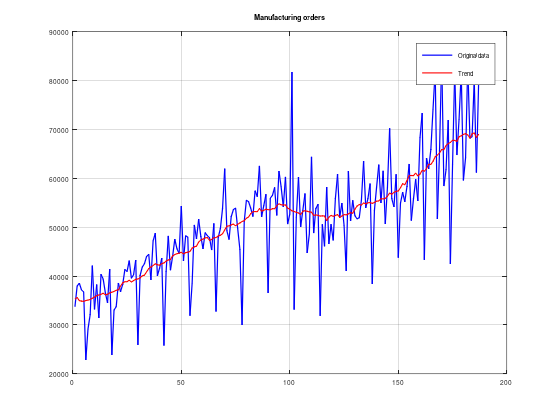

In [46]:
disp('PLOTTING NEW MANUFACTURING ORDERS')
window_m=31
trendmanorder=movmean(manorder,window_m);
plot(manorder,'b','linewidth',1.2)
hold on
plot(trendmanorder,'r','linewidth',1.1)
hold off
grid on
title('Manufacturing orders')
legend('Original data','Trend')

DIFFERENCED TREND
ans =

   452     1

ans =

   451     1



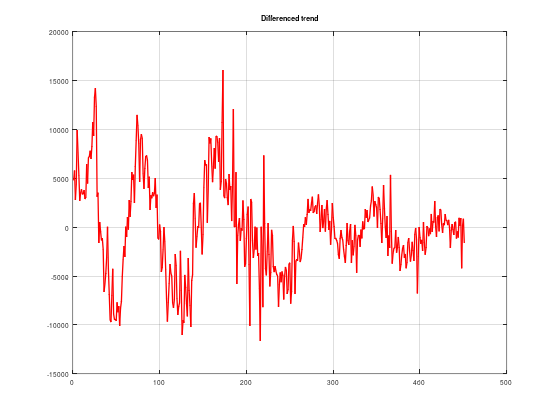

In [49]:
disp('DIFFERENCED TREND')
% DATA AVALIABLE: trendcars, trendhouse, trendworker, trendmanorder


trend=trendcars; % TREND = DATA AVALIABLE TO PLOT DIFFERENCED AND SMOOTHED TREND


size(trend) % size of trend vector
dtrend=diff(trend); % differenced trend is one observation smaller (the first one is gone)
size(dtrend)
xvalues=[1:dtrendrow]; % a vector of x-values, needed for plotting
plot(xvalues,dtrend,'r','linewidth',1.3)
grid on
title('Differenced trend');

TREND SMOOTHING DUE TO EXCESSIVE NOISE
ventana1 = 11
ventana2 = 21


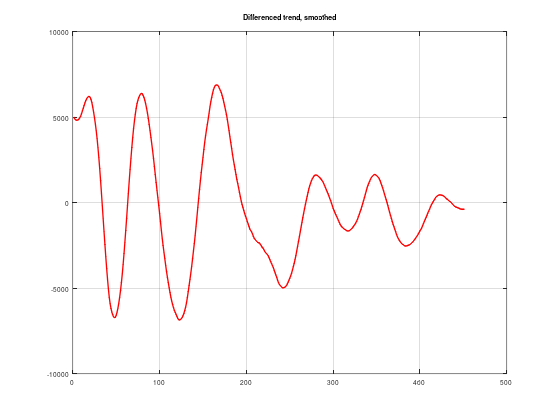

In [50]:
disp('TREND SMOOTHING DUE TO EXCESSIVE NOISE') 
ventana1=11
pkg load control
sm_dtrend=movmean(dtrend,ventana1); % smoothing the differenced trend, but still lots of noise = bad for local maxima finder
ventana2=21
sm_dtrend=movmean(sm_dtrend,ventana2); % smoothing the smoothed diff trend again to get rid of the noise
plot(sm_dtrend,'r','linewidth',1.3)
grid on
hold on
title('Differenced trend, smoothed')

FINDING LOCAL MAXIMA


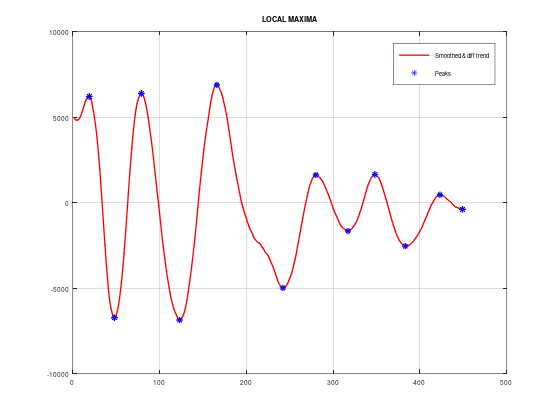

In [51]:
disp('FINDING LOCAL MAXIMA')
pkg load signal % signal package for findpeaks function 
[peaks,locations]=findpeaks(sm_dtrend,'DoubleSided'); 
% findpeaks(data) devuelve un vector con los máximos locales (picos) 
% del vector de la señal de entrada, data. Un pico local es una muestra de datos que es mayor 
% que sus dos muestras vecinas o es igual a Inf. Los picos se muestran por orden de aparición.
% Se excluyen los puntos finales de señal que no sean Inf. Si un pico es plano, la función devuelve solo el punto con el índice más bajo.
plot(sm_dtrend,'r','linewidth',1.3) % smoothed and differenced trend plotted
hold on;
plot(locations,peaks,'linewidth',1.3,'b*');
hold off;
legend('Smoothed & diff trend','Peaks')
title('LOCAL MAXIMA')
grid on

In [52]:
disp('CHECKING LOCAL MAXIMA')
peaks % all local maxima and minima
locations % their corresponding indices in sm_dtrend (smoothed and differenced trend)
peak1=sm_dtrend(locations(1)) % checking correct indexing: the returned value shoudl be the first local optima for sm_dtrend

CHECKING LOCAL MAXIMA
peaks =

   6204.41
  -6724.98
   6384.04
  -6857.00
   6880.53
  -4981.25
   1616.24
  -1659.64
   1645.73
  -2538.15
    459.50
   -390.73

locations =

    19
    48
    79
   123
   166
   242
   280
   317
   348
   383
   423
   449

peak1 = 6204.4


In [53]:
disp('LOCATING RECESSION WARNINGS')
poslocations=locations(peaks>0) % locations of local maxima within the sm_dtrend vector 
pospeaks=peaks(peaks>0) % local maxima, or anitipation of recession (cambios de rumbo)

LOCATING RECESSION WARNINGS
poslocations =

    19
    79
   166
   280
   348
   423

pospeaks =

   6204.41
   6384.04
   6880.53
   1616.24
   1645.73
    459.50



In [54]:
disp('TOOLBOX CONFIGURATION')
addpath('C:/Program Files/E4withSubspaces')
savepath
addpath('C:\Program Files\E4Matlab')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath

TOOLBOX CONFIGURATION


In [2]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1970,1,452); % last input = number of rows of vectors of cars, houses and conworkers, can index with (obs,:)
time=time(3:end,:) % without the first row called 'obs' and the 2nd row because we took first difference 
dates_vector_size=size(time)
smoothed_diff_trend_size=size(sm_dtrend) % trendcars has the same indices as cars
time(poslocations,:) % dates when the local maxima occured

CREATING TIME VECTOR
time =

1970-02-01  
1970-03-01  
1970-04-01  
1970-05-01  
1970-06-01  
1970-07-01  
1970-08-01  
1970-09-01  
1970-10-01  
1970-11-01  
1970-12-01  
1971-01-01  
1971-02-01  
1971-03-01  
1971-04-01  
1971-05-01  
1971-06-01  
1971-07-01  
1971-08-01  
1971-09-01  
1971-10-01  
1971-11-01  
1971-12-01  
1972-01-01  
1972-02-01  
1972-03-01  
1972-04-01  
1972-05-01  
1972-06-01  
1972-07-01  
1972-08-01  
1972-09-01  
1972-10-01  
1972-11-01  
1972-12-01  
1973-01-01  
1973-02-01  
1973-03-01  
1973-04-01  
1973-05-01  
1973-06-01  
1973-07-01  
1973-08-01  
1973-09-01  
1973-10-01  
1973-11-01  
1973-12-01  
1974-01-01  
1974-02-01  
1974-03-01  
1974-04-01  
1974-05-01  
1974-06-01  
1974-07-01  
1974-08-01  
1974-09-01  
1974-10-01  
1974-11-01  
1974-12-01  
1975-01-01  
1975-02-01  
1975-03-01  
1975-04-01  
1975-05-01  
1975-06-01  
1975-07-01  
1975-08-01  
1975-09-01  
1975-10-01  
1975-11-01  
1975-12-01  
1976-01-01  
1976-02-01  
1976-03-01  
1976-04-0